In [7]:
import json
import pandas as pd

import sys
from pathlib import Path
sys.path.append(str(Path("../src/").resolve()))
from desenhar_automatos import desenhar_afn

with open("../data/raw/eAFN2.json", "r") as f:
    data = json.load(f)

df_transicoes = pd.DataFrame(data["transicoes"]).T
df_transicoes.columns = ["a","b","c","ε"]
df_transicoes

,a,b,c,ε
q0,[q0],[q0],[q0],"[q1, q2, q4]"
q1,[qf],[],[],[]
q2,[],[q3],[],[]
q3,[],[qf],[],[]
q4,[],[],[q5],[]
q5,[],[],[q6],[]
q6,[],[],[qf],[]
qf,[],[],[],[]


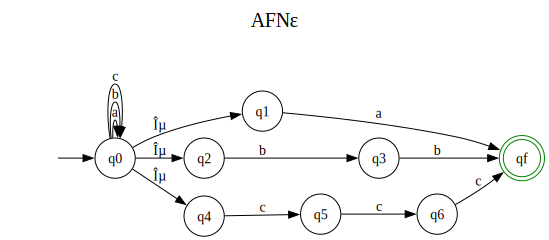

In [8]:
desenhar_afn(data, "AFNε")

In [9]:
def fechoEpsilon(estado, fechamento=None):
    
    if fechamento is None:
        fechamento = set()
    
    fechamento.add(estado)

    proximos_estados = df_transicoes.T[estado]["ε"]
    
    for s in proximos_estados:
        if s not in fechamento:
            fechoEpsilon(s, fechamento)
    
    return fechamento

In [10]:
def novoDelta(qi, x):
    deltaEpsilonQi = fechoEpsilon(qi)
    conjunto_x_mv = [set(df_transicoes[x][s]) for s in deltaEpsilonQi]
    conjunto_transicoes_x = set().union(*conjunto_x_mv)
    conjunto_x_epsilon = [fechoEpsilon(r) for r in conjunto_transicoes_x]
    novas_transicoes_x = set().union(*conjunto_x_epsilon)
    return list(novas_transicoes_x)

In [11]:
# Conjunto de estados finais
estados_finais = set(data["estados_finais"])

# Novas transições
novas_transicoes_AFN = {}
novos_estados_finais = set()

for t in df_transicoes.index.to_list():
    novas_transicoes_AFN[t] = {}
    for a in data["alfabeto"]:
        novas_transicoes_AFN[t][a] = novoDelta(t, a)
        print(t, a, " - ", novoDelta(t, a))

    if fechoEpsilon(t) & estados_finais:
        novos_estados_finais.add(t)
        print(t," é final")

q0 a  -  ['q2', 'qf', 'q0', 'q4', 'q1']
q0 b  -  ['q2', 'q3', 'q0', 'q4', 'q1']
q0 c  -  ['q2', 'q5', 'q0', 'q4', 'q1']
q1 a  -  ['qf']
q1 b  -  []
q1 c  -  []
q2 a  -  []
q2 b  -  ['q3']
q2 c  -  []
q3 a  -  []
q3 b  -  ['qf']
q3 c  -  []
q4 a  -  []
q4 b  -  []
q4 c  -  ['q5']
q5 a  -  []
q5 b  -  []
q5 c  -  ['q6']
q6 a  -  []
q6 b  -  []
q6 c  -  ['qf']
qf a  -  []
qf b  -  []
qf c  -  []
qf  é final


In [12]:
# eAFN, modelo antigo
novo_data = data.copy()

# Atualização do modelo
novo_data["transicoes"] = novas_transicoes_AFN
novo_data["estados_finais"] = list(novos_estados_finais)

# Salvar o JSON
with open("../data/processed/AFN2.json", "w") as f:
    json.dump(novo_data, f, indent=4)

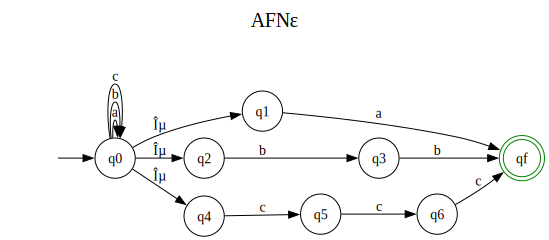

In [13]:
desenhar_afn(data, "AFNε")

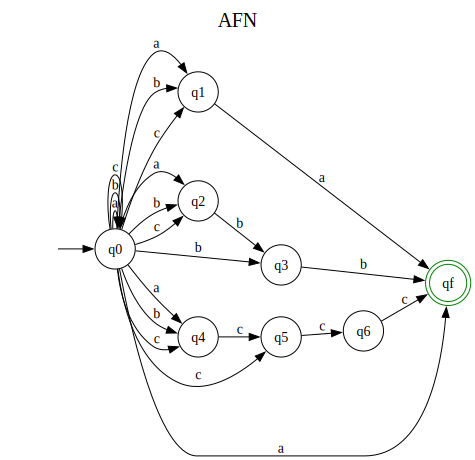

In [14]:
desenhar_afn(novo_data, "AFN")